# we will test the existence surface criterion

In [2]:
import numpy as np
from creation_peigne import *
# MRG packages
import zsolutions4students as zsolutions
import resolve_eq 

generating the mesh

In [ ]:
p_elem2nodes, elem2nodes, node_coords=creation_maillage(hauteur=20,lar_moyenne=20,amplitude_max=15,amplitude_min=7,epaisseur=4,type='triangle',order=False)
affichage(p_elem2nodes,elem2nodes,node_coords,barycentre=False)

In [ ]:
nnodes=node_coords.shape[0]
values_at_nodes_on_boundary = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
f_unassembled = numpy.ones((nnodes, 1), dtype=numpy.complex128)

A1,_=resolve_eq.resolve_eq(p_elem2nodes, elem2nodes, node_coords,f_unassembled,values_at_nodes_on_boundary,D3=False,frequency=0.5)
eig_Val1,eig_Vec1=np.linalg.eig(A1)

we sort the eigen values by existence surface

In [5]:
S1=[] 

for i in range(0,eig_Vec1.shape[0]):

    _,solreal=resolve_eq.resolve_eq(p_elem2nodes, elem2nodes, node_coords,eig_Vec1[i],values_at_nodes_on_boundary,frequency=0.5,affichage=False)
    S1.append((resolve_eq.calcule_surface_existence(solreal),i))  

S1=sorted(S1)

lets look at the 10 most and least localized eigen modes 

solutions by order of localizing the wave
mode number : 248


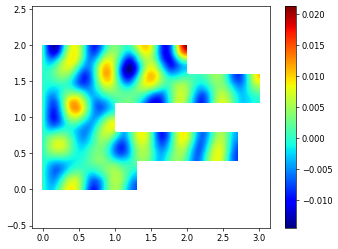

mode number : 287


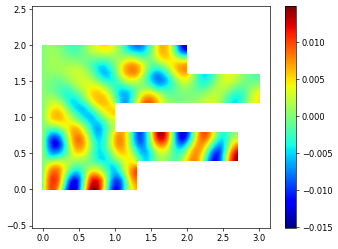

mode number : 63


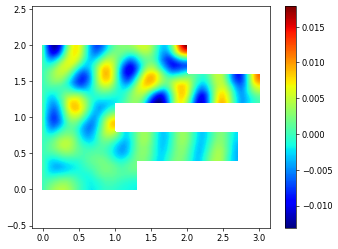

mode number : 363


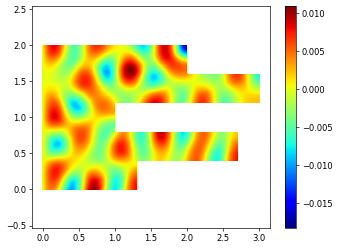

mode number : 250


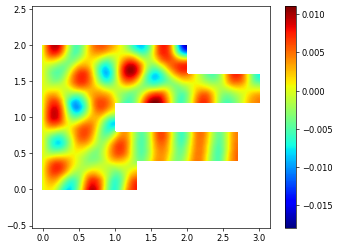

mode number : 356


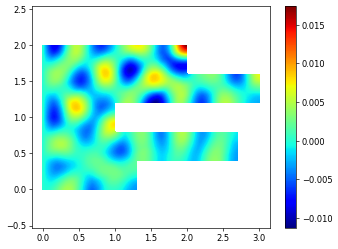

mode number : 85


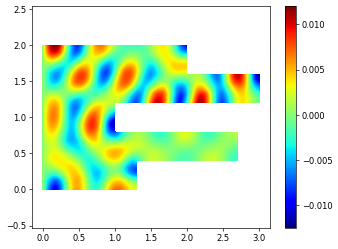

mode number : 194


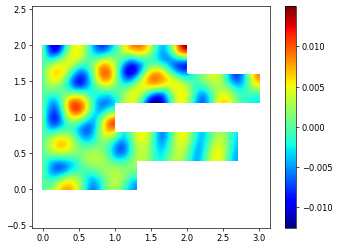

mode number : 117


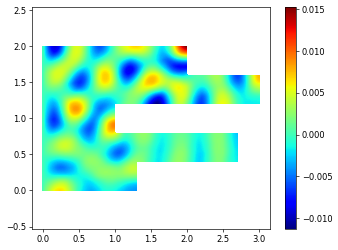

mode number : 451


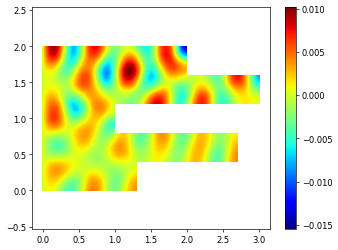

In [6]:
nnodes=node_coords.shape[0]
values_at_nodes_on_boundary = numpy.zeros((nnodes, 1), dtype=numpy.complex128)

print('solutions by order of localizing the wave')
for i in range(10):
    print('mode number : '+str(S1[i][1]))
    resolve_eq.resolve_eq(p_elem2nodes, elem2nodes, node_coords,eig_Vec1[S1[i][1]],values_at_nodes_on_boundary,frequency=0.5)

solutions by order of localizing the wave
mode number : 0


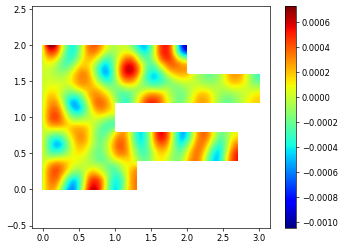

mode number : 141


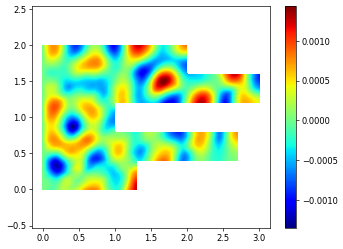

mode number : 218


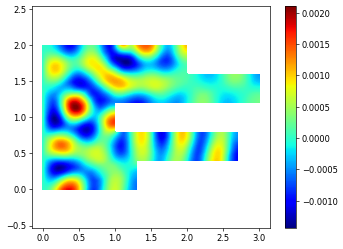

mode number : 55


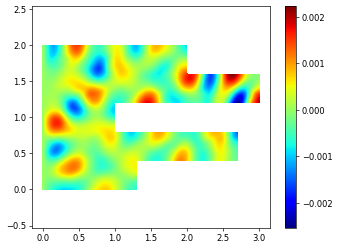

mode number : 33


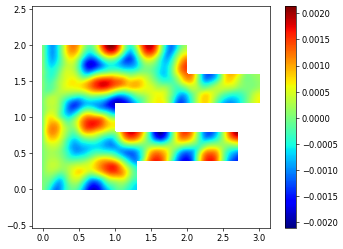

mode number : 358


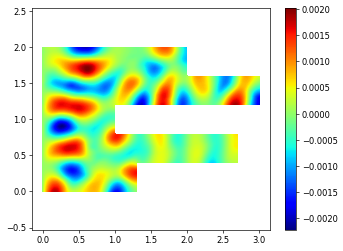

mode number : 103


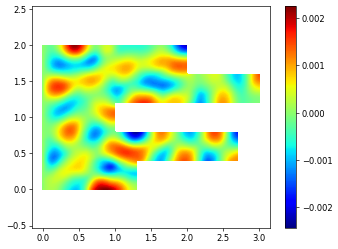

mode number : 133


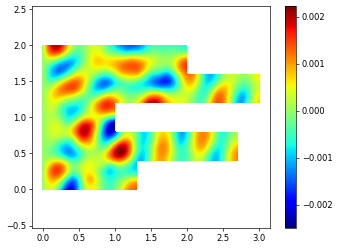

mode number : 283


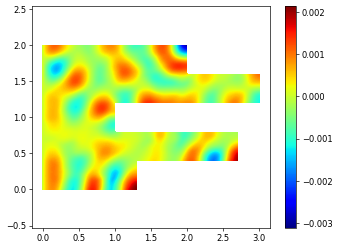

In [7]:
print('solutions by order of localizing the wave')
for i in range(1,10):
    print('mode number : '+str(S1[-i][1]))
    resolve_eq.resolve_eq(p_elem2nodes, elem2nodes, node_coords,eig_Vec1[S1[-i][1]],values_at_nodes_on_boundary,frequency=0.5)

### changing geometry

In [ ]:
p_elem2nodes, elem2nodes, node_coords=creation_maillage(hauteur=20,lar_moyenne=20,amplitude_max=15,amplitude_min=7,epaisseur=2,type='triangle',order=False)
affichage(p_elem2nodes,elem2nodes,node_coords,barycentre=False)

In [ ]:
nnodes=node_coords.shape[0]
values_at_nodes_on_boundary = numpy.zeros((nnodes, 1), dtype=numpy.complex128)
f_unassembled = numpy.ones((nnodes, 1), dtype=numpy.complex128)

A2,_=resolve_eq.resolve_eq(p_elem2nodes, elem2nodes, node_coords,f_unassembled,values_at_nodes_on_boundary,D3=True,frequency=0.5)
eig_Val2,eig_Vec2=np.linalg.eig(A2)

In [14]:
S2=[] 

for i in range(0,eig_Vec2.shape[0]):

    _,solreal=resolve_eq.resolve_eq(p_elem2nodes, elem2nodes, node_coords,eig_Vec2[i],values_at_nodes_on_boundary,frequency=0.5,affichage=False)
    S2.append((resolve_eq.calcule_surface_existence(solreal),i))  

S2=sorted(S2)


solutions by order of localizing the wave
mode number : 296


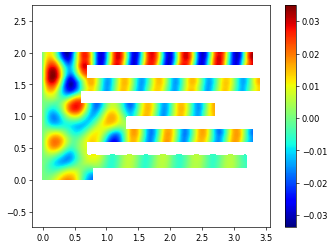

mode number : 421


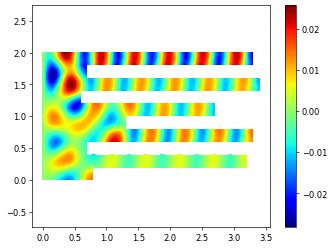

mode number : 213


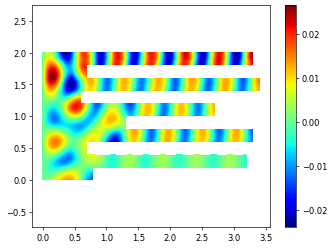

mode number : 324


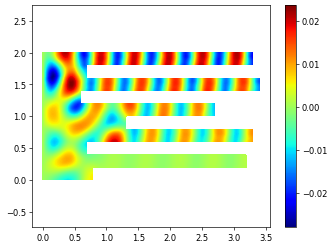

mode number : 210


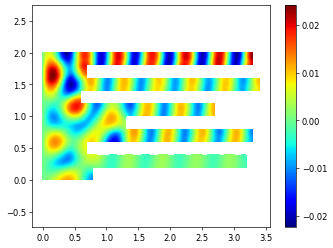

mode number : 259


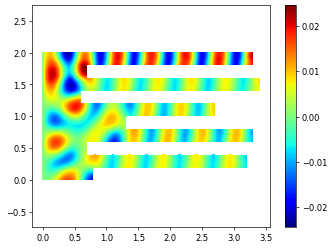

mode number : 439


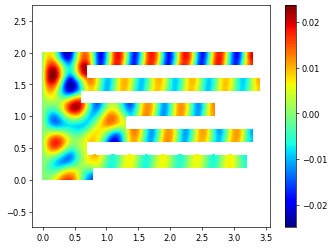

mode number : 422


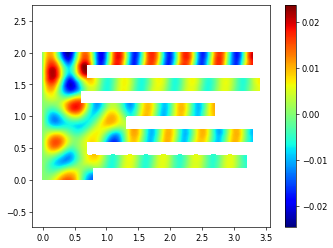

mode number : 341


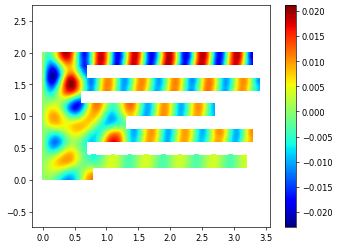

mode number : 223


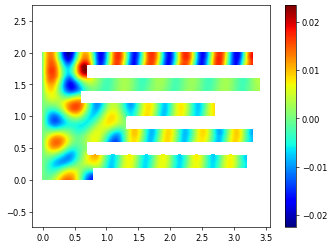

In [15]:
nnodes=node_coords.shape[0]
values_at_nodes_on_boundary = numpy.zeros((nnodes, 1), dtype=numpy.complex128)

print('solutions by order of localizing the wave')
for i in range(10):
    print('mode number : '+str(S2[i][1]))
    resolve_eq.resolve_eq(p_elem2nodes, elem2nodes, node_coords,eig_Vec2[S2[i][1]],values_at_nodes_on_boundary,frequency=0.5)

solutions by order of localizing the wave
mode number : 69


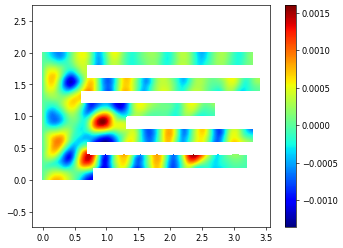

mode number : 487


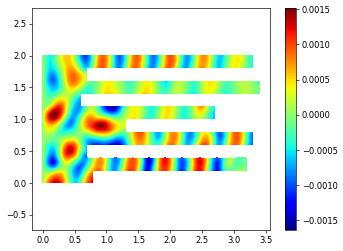

mode number : 156


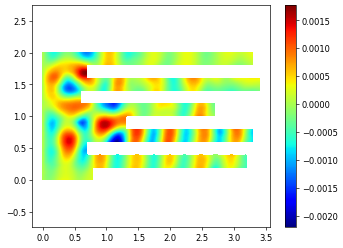

mode number : 503


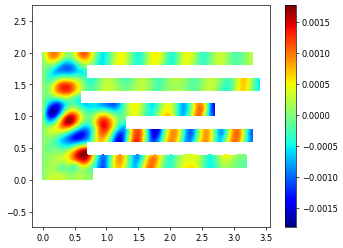

mode number : 419


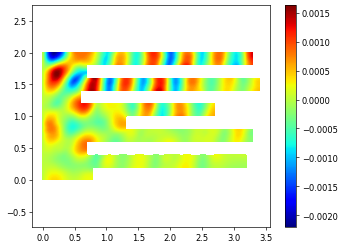

mode number : 427


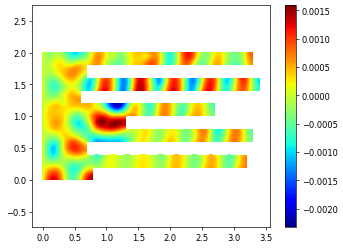

mode number : 30


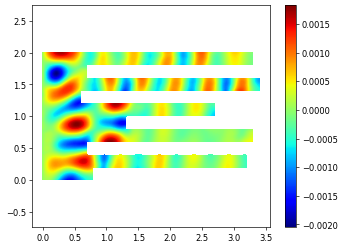

mode number : 51


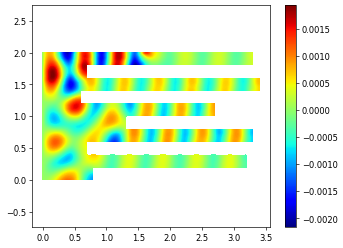

mode number : 479


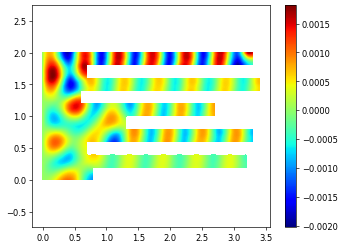

In [16]:
nnodes=node_coords.shape[0]
values_at_nodes_on_boundary = numpy.zeros((nnodes, 1), dtype=numpy.complex128)

print('solutions by order of localizing the wave')
for i in range(1,10):#
    print('mode number : '+str(S2[-i][1]))
    resolve_eq.resolve_eq(p_elem2nodes, elem2nodes, node_coords,eig_Vec2[S2[-i][1]],values_at_nodes_on_boundary,frequency=0.5)

### Existence surface for different cavities

Text(0, 0.5, 'Sn')

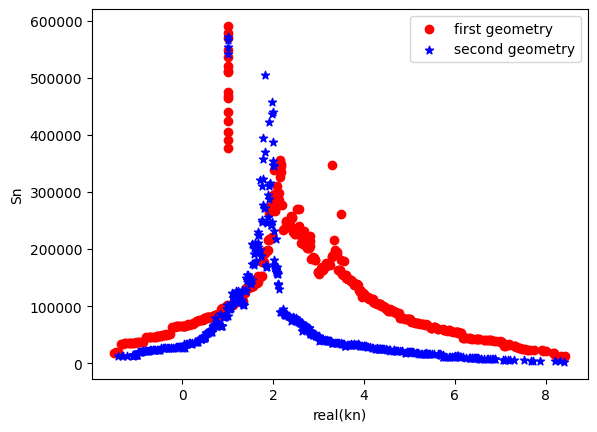

In [26]:
plt.scatter([numpy.real(eig_Val1)[i] for i in range(len(eig_Val1)) if S1[i][0]<600000] , [S1[i][0] for i in range(len(eig_Val1))if S1[i][0]<600000], marker="o", c='r', label='first geometry')
plt.scatter([numpy.real(eig_Val2)[i] for i in range(len(eig_Val2)) if S2[i][0]<600000], [S2[i][0] for i in range(len(eig_Val2)) if S2[i][0]<600000], marker="*", c='b', label='second geometry')
plt.legend()
plt.xlabel('real(kn)')
plt.ylabel('Sn')